# Zalando

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import shuffle

import matplotlib.image as mpimg
from skimage.io import imread, imshow

# distributions
from scipy.stats import randint 
from scipy.stats import uniform


# Import Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adamax
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import RandomUniform, Ones, Zeros, RandomNormal
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

###### Voor Tensorflow-GPU ########

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Zalando 

Fashion-MNIST is een dataset van Zalando bestaande uit afbeeldingen van kledij. De training set ('fashion-mnist_train.csv') bestaat uit 60000 afbeeldingen, de test set ('fashion-mnist_test.csv') uit 10000 afbeeldingen.
Elke grijsafbeelding is 28x28 pixels groot en is toegewezen aan één van de 10 klasses: 

0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'.

Train een neuraal netwerk dat een zo hoog mogelijke accuracy score behaalt op de test set.
Eén optie is om als features de ruwe pixeldata (784 pixels) te gebruiken. Een andere benadering is om via Principle Component Analysis (PCA) de featureset te reduceren en daarmee als het ware feature extraction toe te passen.
Onderzoek welke afbeeldingen niet correct werden geclassificeerd en visualiseer ze.

Tijdens de volgende sessie zullen we op dezelfde dataset convolutional neural networks toepassen. Deze neurale netwerk architectuur leent zich uitstekend voor image classification.

Vergelijk jouw eigen accuracy score met deze opgelijst op https://github.com/zalandoresearch/fashion-mnist.


In [2]:
df_train = pd.read_csv('./fashion-mnist_train.csv')
df_test = pd.read_csv('./fashion-mnist_test.csv')
display(df_train.head())
display(df_train.describe())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [3]:
# Uitwerking Zalando oefening
y_train = df_train["label"]
X_train = df_train.drop(["label"], axis=1)
y_test  = df_test["label"]
X_test  = df_test.drop(["label"], axis=1)

print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test  : ", X_test.shape)
print("y_test  : ", y_test.shape)

X_train :  (60000, 784)
y_train :  (60000,)
X_test  :  (10000, 784)
y_test  :  (10000,)


In [4]:
#one hot encoding van target
y_train_cat = to_categorical(y_train)
print("y_train_cat : ", y_train_cat.shape)

#scaleren van features
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc  = scaler.transform(X_test)

#check on scaling
#pd.DataFrame(X_train_sc, columns=X_train.columns).describe()

y_train_cat :  (60000, 10)


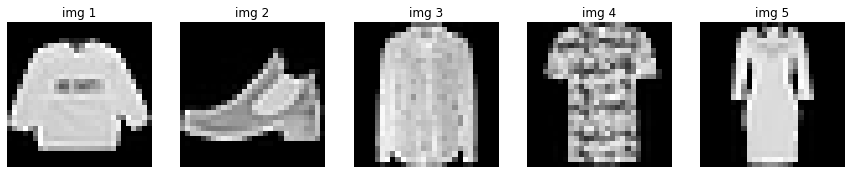

In [5]:
#plotten van een aantal images

rows, cols = (1, 5)
fig, axs = plt.subplots(rows, cols, squeeze=False, figsize=(cols*3,rows*4))
for i in range(rows*cols):
    axs[i//cols, i%cols].imshow(X_train_sc[i].reshape(28,28),cmap='gray')
    axs[i//cols, i%cols].title.set_text("img %d"%(i+1))
    axs[i//cols, i%cols].axis('off')


## Helper functions to create model and plots

In [6]:
def CreateModel(inputs, outputs, hidden_layers = [],
                initializer = RandomUniform(), activation = 'relu', output_activation = 'softmax',
                optimizer = Adam(), extra_name = ''):
    model = Sequential()
    if hidden_layers:
        for i,l in enumerate(hidden_layers):
            if l[0]=='dense':
                model.add(Dense(l[1], input_dim=inputs if i==0 else None, kernel_initializer=initializer, activation=activation))
            elif l[0] == 'dropout':
                model.add(Dropout(l[1]))
            elif l[0] == 'batchnorm':
                model.add(BatchNormalization())
            else:
                raise NotImplementedError("layer type %s not implemented"%l[0])
        model.add(Dense(outputs, kernel_initializer=initializer, activation=output_activation))
    else:
        #model without hiffen layers
        model.add(Dense(outputs, input_dim=inputs, kernel_initializer=initializer, activation=output_activation))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    
    def layer_id(l):
        if l[0] in ['dense', 'dropout']:
            return str(l[1])
        elif l[0] == 'batchnorm':
            return 'bn'
        else:
            return 'NaL'
    
    name = [ layer_id(l) for l in layers ]  
    name = '-'.join(name) + '-' + activation + '-' + extra_name
    
    return model, name


In [7]:
# Plot history
def histplot(history, name):
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    print(fig)

    #axs[0].rcParams['axes.labelsize'] = 15
    axs[0].plot(history.history['loss'],'red',linewidth=3.0, label="loss")
    axs[0].plot(history.history['val_loss'],'blue',linewidth=3.0, label="val_loss")
    axs[0].legend()
    axs[0].set_xlabel('epochs')
    axs[0].set_ylabel('Training error')
    #axs[0].set_ylim((0,1.5))
    axs[0].grid()
    axs[0].set_title(name)

    #axs[1].rcParams['axes.labelsize'] = 15
    axs[1].plot(history.history['accuracy'],'red',linewidth=3.0, label="accuracy")
    axs[1].plot(history.history['val_accuracy'],'blue',linewidth=3.0, label="val_accuracy")
    axs[1].legend()
    axs[1].set_xlabel('epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].grid()
    fig.savefig(name+'.png')


## Initial model test, just see if something happens

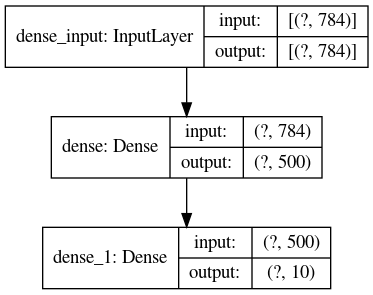

In [8]:
layers = [ ['dense', 500], 
         ]
model1, name1 = CreateModel(X_train_sc.shape[1], y_train_cat.shape[1], hidden_layers=layers)

#model1.summary()
plot_model(model1, 'model.png', show_shapes=True)

In [9]:
# train the model
batch_size = 64
epochs = 20
history1 = model1.fit(X_train_sc, y_train_cat, epochs=epochs, validation_split = 0.05, verbose=1)

Train on 57000 samples, validate on 3000 samples
Epoch 1/20
57000/57000 [==============================] - 7s 122us/sample - loss: 0.4887 - accuracy: 0.8245 - val_loss: 0.4081 - val_accuracy: 0.8557
Epoch 2/20
57000/57000 [==============================] - 7s 121us/sample - loss: 0.3665 - accuracy: 0.8674 - val_loss: 0.3790 - val_accuracy: 0.8603
Epoch 3/20
57000/57000 [==============================] - 7s 122us/sample - loss: 0.3292 - accuracy: 0.8792 - val_loss: 0.3496 - val_accuracy: 0.8767
Epoch 4/20
57000/57000 [==============================] - 7s 115us/sample - loss: 0.3074 - accuracy: 0.8865 - val_loss: 0.3391 - val_accuracy: 0.8783
Epoch 5/20
57000/57000 [==============================] - 7s 117us/sample - loss: 0.2848 - accuracy: 0.8962 - val_loss: 0.3345 - val_accuracy: 0.8740
Epoch 6/20
57000/57000 [==============================] - 6s 111us/sample - loss: 0.2709 - accuracy: 0.8993 - val_loss: 0.3381 - val_accuracy: 0.8773
Epoch 7/20
57000/57000 [===========================

Figure(864x432)


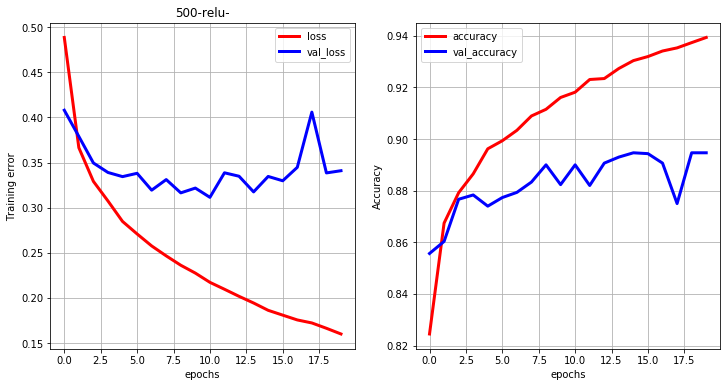

In [10]:
histplot(history1, name1)    

In [11]:
# Testen met test set
y_pred = model1.predict_classes(X_test_sc)
print("Accuracy score : %.1f"%(accuracy_score(y_test, y_pred) * 100)) 
print()
print(classification_report(y_test, y_pred))
#cf = confusion_matrix(y_test, y_pred)
#print(cf)
print("Confusion matrix : ")
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
display(df_confusion)

Accuracy score : 89.8

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.80      0.83      1000
           3       0.92      0.92      0.92      1000
           4       0.82      0.87      0.85      1000
           5       0.97      0.96      0.97      1000
           6       0.72      0.73      0.73      1000
           7       0.93      0.96      0.94      1000
           8       0.99      0.96      0.98      1000
           9       0.97      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion matrix : 


Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,852,0,16,17,6,1,105,0,3,0
1,3,985,0,11,0,0,1,0,0,0
2,10,0,799,10,105,0,75,0,1,0
3,22,10,7,917,24,1,18,0,1,0
4,2,0,41,20,873,0,64,0,0,0
5,1,0,0,0,0,963,1,21,1,13
6,142,1,60,18,48,0,727,0,4,0
7,0,0,0,0,0,22,1,961,0,16
8,3,0,7,2,6,4,12,1,964,1


### Conclusie eerste test

- gewoon alle gescalleerde features aan een netwerk voeren, het netwerk heeft 1 hidden layer van 500 neuronen
- we trainen op zoveel mogelijk samples, en houden de validatie set dus klein (validatie set is enkel gebruikt om in de grafiek overfitting te detecteren)
- er onstaat een lichte vorm van overfiting (train accuracy (~ 94% ) > vaidatie_accuracy ( ~ 89% ) ) 
- na 20 epochs is de training loss nog steeds aan het dalen, echter de validatie niet meer --> het heeft geen zin om verder te trainen, dit zal enkel voor meer overfitting zorgen. 

- **op de test set wordt een accuracy van 89.8% gehaald, niet slecht voor een eerste test**.
- de confusion matrix vertoont redelijk grote foute voorspellingen tussen klasse 0 en 6. Als we kijken wat voor klasses dat zijn : 0 = T-shirt, 6 = Shirt. Niet te verwonderen dat deze een probleem vormen, ze gelijken van nature uit sterk op elkaar. 
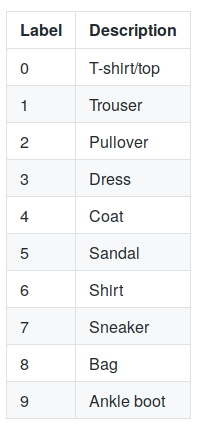



## Verfijnen van model



In [12]:
layers = [ ['dense', 100], ['dropout', 0.3],
           ['dense', 100], ['dropout', 0.3],
         ]
model2, name2 = CreateModel(X_train_sc.shape[1], y_train_cat.shape[1], hidden_layers=layers)

#model1.summary()
#plot_model(model1, 'model.png', show_shapes=True)

In [13]:
# train the model
batch_size = 32
epochs = 60
history2 = model2.fit(X_train_sc, y_train_cat, epochs=epochs, validation_split = 0.05, verbose=1)

Train on 57000 samples, validate on 3000 samples
Epoch 1/60
57000/57000 [==============================] - 5s 83us/sample - loss: 0.6127 - accuracy: 0.7757 - val_loss: 0.4403 - val_accuracy: 0.8420
Epoch 2/60
57000/57000 [==============================] - 4s 73us/sample - loss: 0.4681 - accuracy: 0.8337 - val_loss: 0.4040 - val_accuracy: 0.8577
Epoch 3/60
57000/57000 [==============================] - 4s 75us/sample - loss: 0.4347 - accuracy: 0.8444 - val_loss: 0.4001 - val_accuracy: 0.8587
Epoch 4/60
57000/57000 [==============================] - 4s 75us/sample - loss: 0.4180 - accuracy: 0.8503 - val_loss: 0.3748 - val_accuracy: 0.8637
Epoch 5/60
57000/57000 [==============================] - 4s 74us/sample - loss: 0.4057 - accuracy: 0.8543 - val_loss: 0.3675 - val_accuracy: 0.8680
Epoch 6/60
57000/57000 [==============================] - 4s 74us/sample - loss: 0.3932 - accuracy: 0.8582 - val_loss: 0.3734 - val_accuracy: 0.8653
Epoch 7/60
57000/57000 [==============================] -

57000/57000 [==============================] - 4s 73us/sample - loss: 0.2938 - accuracy: 0.8927 - val_loss: 0.3254 - val_accuracy: 0.8813
Epoch 56/60
57000/57000 [==============================] - 4s 76us/sample - loss: 0.2930 - accuracy: 0.8911 - val_loss: 0.3302 - val_accuracy: 0.8840
Epoch 57/60
57000/57000 [==============================] - 4s 76us/sample - loss: 0.2946 - accuracy: 0.8923 - val_loss: 0.3389 - val_accuracy: 0.8753
Epoch 58/60
57000/57000 [==============================] - 4s 74us/sample - loss: 0.2896 - accuracy: 0.8927 - val_loss: 0.3330 - val_accuracy: 0.8847
Epoch 59/60
57000/57000 [==============================] - 4s 73us/sample - loss: 0.2906 - accuracy: 0.8929 - val_loss: 0.3342 - val_accuracy: 0.8840
Epoch 60/60
57000/57000 [==============================] - 4s 73us/sample - loss: 0.2898 - accuracy: 0.8932 - val_loss: 0.3231 - val_accuracy: 0.8843


Figure(864x432)


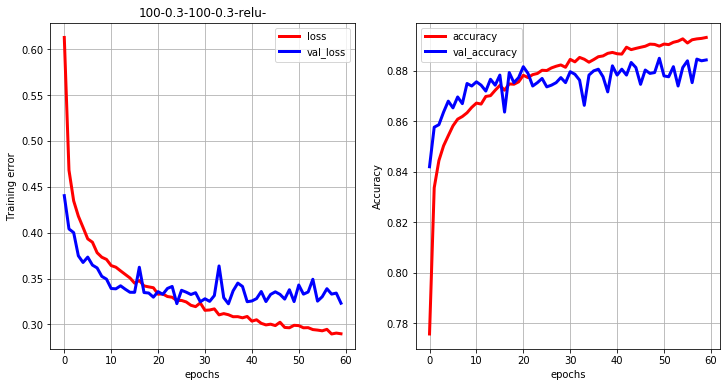

In [14]:
histplot(history2, name2)    

In [15]:
# Testen met test set
y_pred = model2.predict_classes(X_test_sc)
print("Accuracy score : %.1f"%(accuracy_score(y_test, y_pred) * 100)) 
print()
print(classification_report(y_test, y_pred))
#cf = confusion_matrix(y_test, y_pred)
#print(cf)
print("Confusion matrix : ")
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
display(df_confusion)

Accuracy score : 88.8

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.78      0.85      0.81      1000
           3       0.90      0.90      0.90      1000
           4       0.82      0.84      0.83      1000
           5       0.97      0.94      0.96      1000
           6       0.77      0.61      0.68      1000
           7       0.92      0.95      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion matrix : 


Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,884,0,15,23,0,1,70,0,7,0
1,3,980,6,8,1,0,2,0,0,0
2,21,0,849,11,73,0,43,0,3,0
3,26,15,10,902,33,0,12,0,2,0
4,1,1,99,22,837,0,39,0,1,0
5,1,0,0,2,0,945,0,38,2,12
6,185,1,100,26,74,0,607,0,7,0
7,0,0,0,0,0,16,0,954,0,30
8,3,0,8,3,2,1,11,2,970,0


### Conclusie na verfijnen van model

- een aantal zaken geprobeerd zoals meer layers, meer of minder neuronen per layer, andere batch size, al of niet dropout toegoeen indien te snel overfitting optreedt
- we blijven met een accuracy op de test set van **maximum 90% zitten**

- andere methodes moeten dus uitgeprobeerd worden om dit eventueel nog te verhogen. Hieronder een test via PCA.


## Via PCA componenten 

In [16]:
from sklearn.decomposition import PCA

In [17]:
#try to get around 90% of the variance in the components

In [18]:
# Dimensionality reduction: Principle Component Analysis met 40 componenten

number_of_components = 80

pca_model = PCA(n_components=number_of_components, svd_solver='full')
#Train het PCA algoritme op de training data
pca_model.fit(X_train_sc)
#Reduceer het aantal dimensies van zowel de trainig set als de test set
train_img_pca = pca_model.transform(X_train_sc)
test_img_pca  = pca_model.transform(X_test_sc)



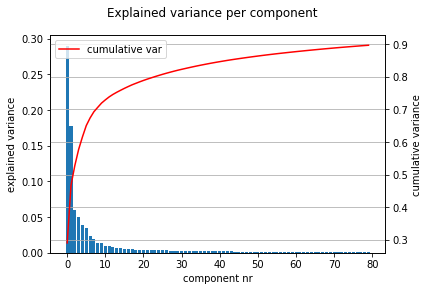

In [19]:
plt.bar(range(number_of_components), height = pca_model.explained_variance_ratio_, label="var per component")
plt.gca().set_xlabel("component nr")
plt.gca().set_ylabel("explained variance")
ax = plt.gca().twinx()
ax.plot(range(number_of_components), np.cumsum(pca_model.explained_variance_ratio_), "r", label="cumulative var")
ax.set_ylabel("cumulative variance")
plt.suptitle("Explained variance per component")
plt.legend()
plt.grid()

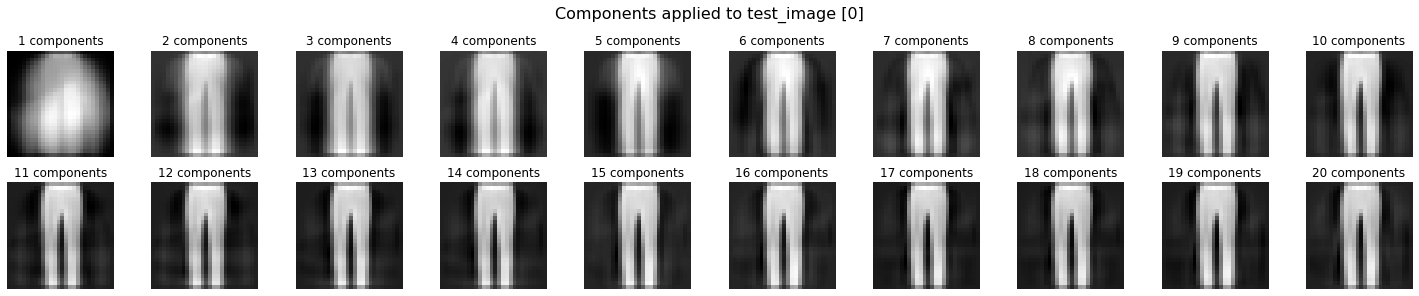

In [20]:
#reconstruction component by component, not needed, but I wanted to see this
#use the formula for the inverse transform (https://stackoverflow.com/questions/32750915/pca-inverse-transform-manually)
data_steps = [np.dot(test_img_pca[1][:i+1], pca_model.components_[:i+1]) + pca_model.mean_ for i in range(number_of_components)]

rows, cols = (2, 10)
#rows, cols = (8, 5)  #uncomment to show all 40 components
comp_to_show = rows*cols
fig, axs = plt.subplots(rows, cols, figsize=(cols*2,rows*2), constrained_layout=True)
for i in range(comp_to_show):
    #print(components[i].shape)
    axs[i//cols, i%cols].imshow(data_steps[i].reshape(28,28),cmap='gray')
    axs[i//cols, i%cols].title.set_text("%d components"%(i+1))
    axs[i//cols, i%cols].axis('off')
plt.suptitle("Components applied to test_image [0]", fontsize=16);

In [21]:
train_img_pca.shape

(60000, 80)

In [22]:
#create and fir nn network

layers = [ ['dense', 40], ['dropout', 0.15], 
           ['dense', 40], ['dropout', 0.15], 
         ]
model3, name3 = CreateModel(train_img_pca.shape[1], y_train_cat.shape[1], hidden_layers=layers)

#model1.summary()
#plot_model(model1, 'model.png', show_shapes=True)

In [23]:
# train the model
batch_size = 32
epochs = 50
history3 = model3.fit(train_img_pca, y_train_cat, epochs=epochs, validation_split = 0.05, verbose=1)

Train on 57000 samples, validate on 3000 samples
Epoch 1/50
57000/57000 [==============================] - 3s 55us/sample - loss: 0.5541 - accuracy: 0.7982 - val_loss: 0.4379 - val_accuracy: 0.8430
Epoch 2/50
57000/57000 [==============================] - 3s 50us/sample - loss: 0.4492 - accuracy: 0.8397 - val_loss: 0.4058 - val_accuracy: 0.8497
Epoch 3/50
57000/57000 [==============================] - 3s 47us/sample - loss: 0.4262 - accuracy: 0.8475 - val_loss: 0.3908 - val_accuracy: 0.8610
Epoch 4/50
57000/57000 [==============================] - 3s 46us/sample - loss: 0.4094 - accuracy: 0.8530 - val_loss: 0.3811 - val_accuracy: 0.8657
Epoch 5/50
57000/57000 [==============================] - 3s 46us/sample - loss: 0.3988 - accuracy: 0.8557 - val_loss: 0.3747 - val_accuracy: 0.8663
Epoch 6/50
57000/57000 [==============================] - 3s 46us/sample - loss: 0.3908 - accuracy: 0.8596 - val_loss: 0.3643 - val_accuracy: 0.8700
Epoch 7/50
57000/57000 [==============================] -

Figure(864x432)


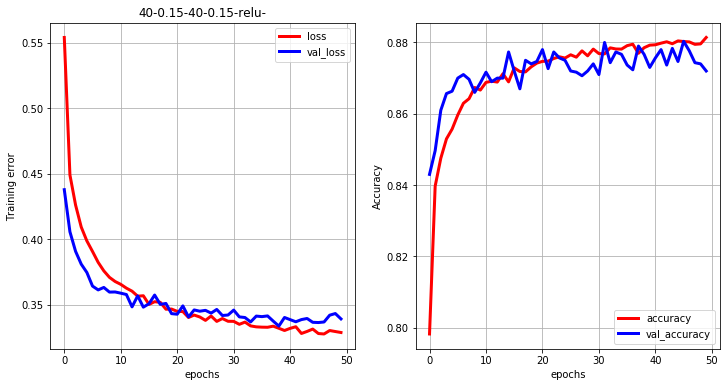

In [24]:
histplot(history3, name3)    

In [25]:
# Testen met test set
y_pred = model3.predict_classes(test_img_pca)
print("Accuracy score : %.1f"%(accuracy_score(y_test, y_pred) * 100)) 
print()
print(classification_report(y_test, y_pred))
#cf = confusion_matrix(y_test, y_pred)
#print(cf)
print("Confusion matrix : ")
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
display(df_confusion)

Accuracy score : 88.2

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.84      0.79      0.81      1000
           3       0.88      0.91      0.89      1000
           4       0.81      0.84      0.83      1000
           5       0.97      0.94      0.95      1000
           6       0.70      0.68      0.69      1000
           7       0.90      0.95      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.93      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion matrix : 


Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,831,2,11,33,1,0,111,0,11,0
1,3,976,2,14,0,0,5,0,0,0
2,11,1,787,11,94,0,90,0,6,0
3,16,15,6,910,28,1,21,0,3,0
4,0,1,63,32,842,0,58,0,4,0
5,0,0,0,1,0,935,0,42,6,16
6,136,5,66,29,72,0,682,0,10,0
7,0,0,0,0,0,20,0,954,1,25
8,1,0,5,4,4,3,8,2,972,1


## conclusie PCA
- we splitsen in PCA componenten, en regelen het aantal componenten tot we ongeveer 90% van de variatie kunnen verklaren. 
- de accuracy van verschillende geteste netwerken blijft ook hangen op ongeveer **89%** maximum.
    - we hebben niet echt veel performantie verloren door PCA te gebruiken
    - we bekomen wel een kleinder netwerk dat sneller te trainen is

## Using ImageAugmentation

We kunnen gemakkelijk image augmentation toevoegen door vb alle training images ook links-rechts te spiegelen. Hierdoor kunnen we de training set verdubbellen. 
Dit werd hiet manueel uitgevoerd.

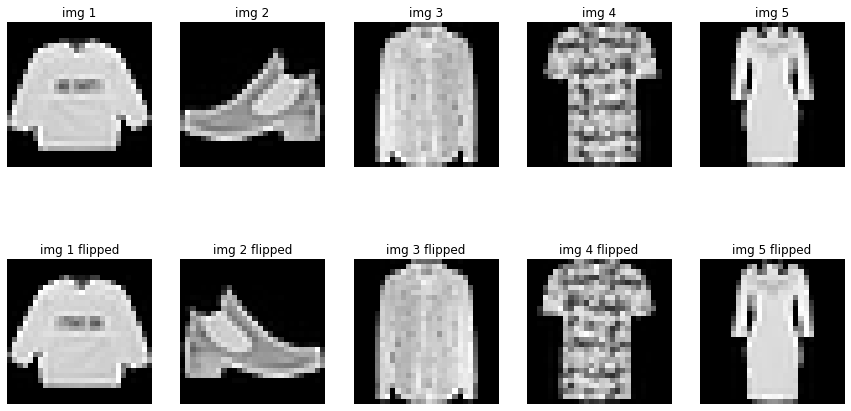

In [26]:
def mirror(x):
    img = x.reshape(28,28)
    f_img = np.fliplr(img)
    return f_img.reshape(-1)

#test flip
rows, cols = (2, 5)
fig, axs = plt.subplots(rows, cols, squeeze=False, figsize=(cols*3,rows*4))
for i in range(cols):
    axs[0, i%cols].imshow(X_train_sc[i].reshape(28,28),cmap='gray')
    axs[0, i%cols].title.set_text("img %d"%(i+1))
    axs[0, i%cols].axis('off')
for i in range(cols):
    axs[1, i%cols].imshow(mirror(X_train_sc[i]).reshape(28,28),cmap='gray')
    axs[1, i%cols].title.set_text("img %d flipped"%(i+1))
    axs[1, i%cols].axis('off')


In [27]:
X_train_fl = np.array([mirror(x) for x in X_train_sc])

X_train_aug =np.concatenate((X_train_sc, X_train_fl), axis=0)
y_train_aug =np.concatenate((y_train_cat, y_train_cat), axis=0)

#shuffle the mirrired ones in between the rest
X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)

print(X_train_aug.shape)
print(y_train_aug.shape)


(120000, 784)
(120000, 10)


In [28]:
layers = [ ['dense', 400], 
           ['dense', 400], 
         ]
model4, name4 = CreateModel(X_train_aug.shape[1], y_train_cat.shape[1], hidden_layers=layers)

#model4.summary()
#plot_model(model4, 'model.png', show_shapes=True)

In [29]:
# train the model
batch_size = 64
epochs = 20
history4 = model4.fit(X_train_aug, y_train_aug, epochs=epochs, validation_split = 0.05, verbose=1)

Train on 114000 samples, validate on 6000 samples
Epoch 1/20
114000/114000 [==============================] - 13s 111us/sample - loss: 0.4305 - accuracy: 0.8415 - val_loss: 0.3485 - val_accuracy: 0.8708
Epoch 2/20
114000/114000 [==============================] - 13s 112us/sample - loss: 0.3288 - accuracy: 0.8783 - val_loss: 0.3279 - val_accuracy: 0.8743
Epoch 3/20
114000/114000 [==============================] - 13s 115us/sample - loss: 0.3006 - accuracy: 0.8872 - val_loss: 0.3385 - val_accuracy: 0.8725
Epoch 4/20
114000/114000 [==============================] - 13s 110us/sample - loss: 0.2767 - accuracy: 0.8962 - val_loss: 0.3072 - val_accuracy: 0.8805
Epoch 5/20
114000/114000 [==============================] - 13s 111us/sample - loss: 0.2596 - accuracy: 0.9026 - val_loss: 0.2913 - val_accuracy: 0.8945
Epoch 6/20
114000/114000 [==============================] - 12s 106us/sample - loss: 0.2430 - accuracy: 0.9079 - val_loss: 0.2801 - val_accuracy: 0.8985
Epoch 7/20
114000/114000 [======

Figure(864x432)


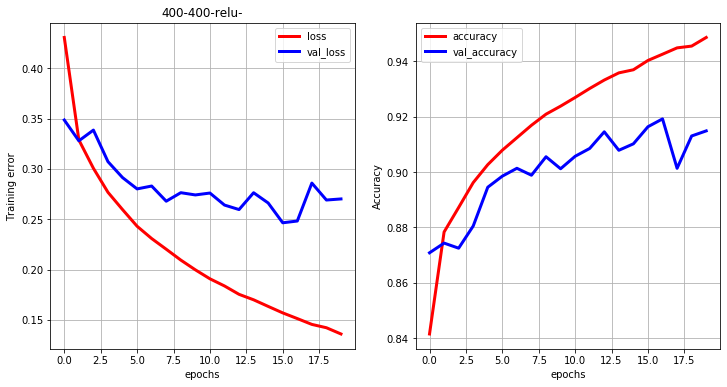

In [30]:
histplot(history4, name4)   

In [31]:
# Testen met test set
y_pred = model4.predict_classes(X_test_sc)
print("Accuracy score : %.1f"%(accuracy_score(y_test, y_pred) * 100)) 
print()
print(classification_report(y_test, y_pred))
#cf = confusion_matrix(y_test, y_pred)
#print(cf)
print("Confusion matrix : ")
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
display(df_confusion)

Accuracy score : 89.9

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.99      0.99      0.99      1000
           2       0.81      0.84      0.83      1000
           3       0.92      0.91      0.92      1000
           4       0.84      0.84      0.84      1000
           5       0.98      0.95      0.96      1000
           6       0.77      0.70      0.74      1000
           7       0.95      0.93      0.94      1000
           8       0.98      0.98      0.98      1000
           9       0.92      0.98      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion matrix : 


Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,876,0,14,11,4,0,91,0,4,0
1,2,987,1,8,0,1,1,0,0,0
2,19,2,845,12,74,0,48,0,0,0
3,23,5,12,910,28,1,16,0,5,0
4,3,1,87,21,840,0,46,0,2,0
5,0,0,1,0,0,949,0,29,1,20
6,142,1,78,23,50,0,701,0,5,0
7,0,0,0,0,0,12,0,925,1,62
8,6,1,5,1,2,1,4,1,977,2


## conclusie ImageAugmentation
- we voegen van alle training voorbeelden een spiegelbeeld toe, in de hoop dat het model verder door trained en minder specifiek wordt
- de accuracy van verschillende geteste configuraties van netwerken blijft ook hangen op ongeveer **89.9%** maximum.
    - we hebben niet echt een betere classifier gemaakt
    

## voorbeelden ven verkeerde classificaties

In [32]:
y_pred  = model1.predict_classes(X_test_sc)
correct = y_pred == y_test
wrong_indexes, = np.where(correct==False)
print(wrong_indexes)

[   4    5   12 ... 9963 9964 9972]


In [35]:
labels={0:"T-shirt",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankleboot"}

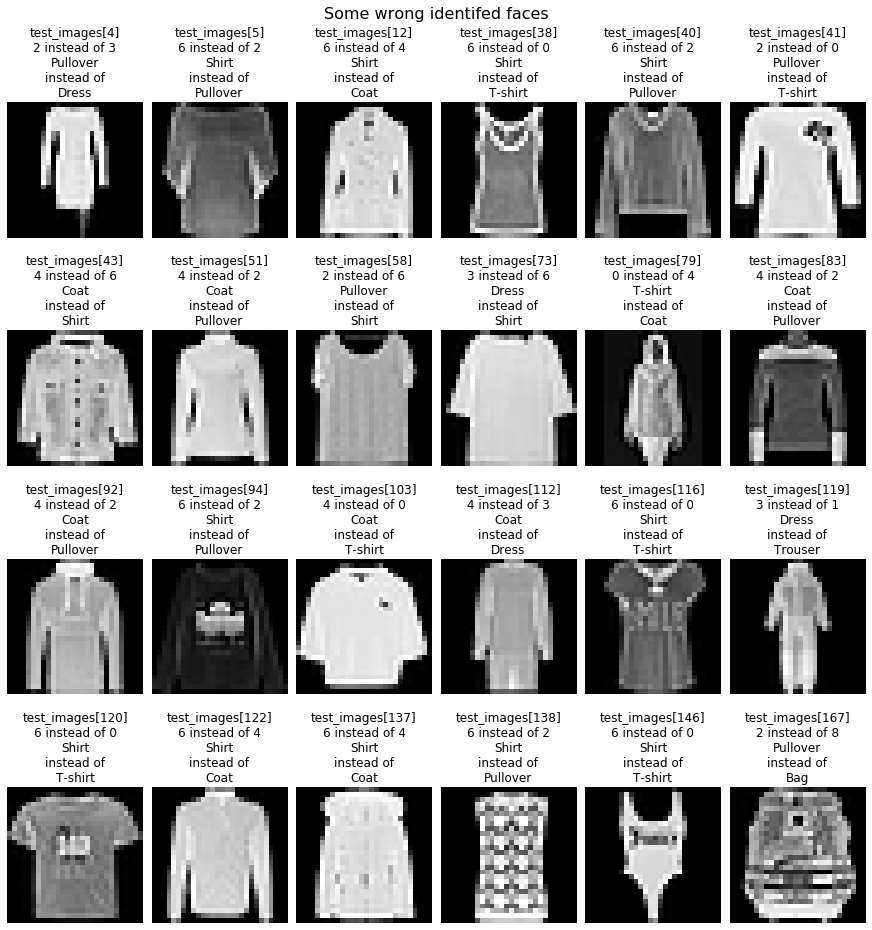

In [39]:
# show a number of wrong classified images, change nr with changing rows and columns to show
rows, cols = (4, 6)
comp_to_show = rows*cols
fig, axs = plt.subplots(rows, cols, figsize=(cols*2,rows*3+1), constrained_layout=True)
for i in range(comp_to_show):
    index = wrong_indexes[i]
    axs[i//cols, i%cols].imshow(X_test_sc[index].reshape(28,28),cmap='gray')
    axs[i//cols, i%cols].title.set_text("test_images[%d]\n%d instead of %d\n%s\ninstead of\n%s"%(index, 
                                                                        y_pred[index], y_test[index],
                                                                        labels[y_pred[index]], labels[y_test[index]]))
    axs[i//cols, i%cols].axis('off')
plt.suptitle("Some wrong identifed images", fontsize=16);

# Conclusies Zalando dataset met dense feedforwad netwerk

- we bekomen redelijk snel een performatie van een kleine **90%**
- verschillnde technieken werden uitgetest om de performantie te verbeteren, echter zonder goed resultaat. 
    - PCA componenten analyse : gelijkaardige performantie met kleiner netwerk, echeter de overheid van de PCA moet meergerekend worden in de complexiteit van de oplossing.
    - ImageAugmentation : spiegelbeelden van de training samples werfen toegevoegd, dus we hebben een verdubbeling van de training data. Dit geeft ook geen verbetering op de classificatie van de testset. 
    
    